# Difracción de rayos X. Ley de Bragg

In [1]:
import math
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from scipy.signal import find_peaks, argrelextrema
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data
DATA_PATH = "data/"

# Figures
FIGURES_PATH = "figures/"

In [2]:
list_dir = os.listdir(DATA_PATH)

csv_files = []
d = {}

for file in list_dir:
    if "csv" in file:
        k = file.split(".")[0]
        d[k] = pd.read_csv(DATA_PATH + file)
        csv_files.append(k)

csv_files.sort(reverse=True)
df = pd.concat(d.values(), axis=1, keys=d.keys())
df

LiF-22kV            LiF-13kV            KBr-25kV            LiF-15kV  \
       theta intensidad    theta intensidad    theta intensidad    theta   
0        4.8      73.33      5.0       0.00      4.8    1832.00      5.0   
1        5.0      73.33      5.3       0.00      5.0    1820.00      5.2   
2        5.2      70.67      6.0       1.33      5.4    1820.00      5.4   
3        5.6      70.67      6.4       0.00      5.6    1829.33      5.8   
4        5.9      68.00      6.9       0.00      5.8    1821.33      6.0   
..       ...        ...      ...        ...      ...        ...      ...   
116      NaN        NaN      NaN        NaN     43.4    1817.67     42.4   
117      NaN        NaN      NaN        NaN      NaN        NaN     42.7   
118      NaN        NaN      NaN        NaN      NaN        NaN     43.1   
119      NaN        NaN      NaN        NaN      NaN        NaN     43.6   
120      NaN        NaN      NaN        NaN      NaN        NaN     43.7   

               LiF-25kV            LiF-19kV             
    intensidad    theta intensidad    theta intensidad  
0        21.33      5.0      94.67      5.4      50.67  
1        25.33      5.2      88.00      5.8      44.00  
2        24.00      5.4      90.67      6.4      42.67  
3        24.00      5.8      96.00      6.8      45.33  
4        21.33      6.0      96.00      7.2      41.33  
..         ...      ...        ...      ...        ...  
116      26.67      NaN        NaN      NaN        NaN  
117      27.33      NaN        NaN      NaN        NaN  
118      24.67      NaN        NaN      NaN        NaN  
119      24.00      NaN        NaN      NaN        NaN  
120      22.93      NaN        NaN      NaN        NaN  

[121 rows x 12 columns]

-----
Datos:  LiF-25kV
Puntos máximos: (Ángulo, Intensidad):  [(7.9, 170.67), (9.8, 198.67), (10.8, 212.0), (11.4, 206.67), (12.0, 216.0), (12.5, 210.67), (13.5, 192.0), (14.5, 180.67), (16.0, 171.33), (17.0, 178.67), (18.0, 154.67), (19.5, 560.0), (21.9, 1750.0), (23.7, 126.0), (24.5, 118.67), (25.3, 112.67), (26.1, 108.0), (28.4, 97.33), (29.2, 105.33), (31.1, 98.67), (32.7, 96.67), (33.9, 92.67), (34.7, 94.67), (35.4, 94.0), (36.2, 91.33), (37.4, 95.33), (39.0, 88.67), (39.8, 88.0), (41.0, 90.67), (42.4, 119.33), (43.2, 92.0)]
 
-----
Datos:  LiF-22kV
Puntos máximos: (Ángulo, Intensidad):  [(6.9, 72.0), (7.6, 80.0), (8.6, 125.33), (9.4, 140.67), (9.8, 160.0), (10.6, 149.33), (11.6, 156.0), (12.6, 156.0), (15.1, 142.67), (16.1, 129.33), (17.2, 128.67), (18.4, 134.67), (19.6, 361.33), (22.0, 1277.33), (23.5, 104.0), (24.6, 86.0), (27.7, 89.33), (30.5, 70.67), (31.2, 71.33), (32.1, 73.33), (32.8, 76.0), (35.2, 73.33), (40.2, 66.67)]
 
-----
Datos:  LiF-19kV
Puntos máximos: (Ángulo, Int

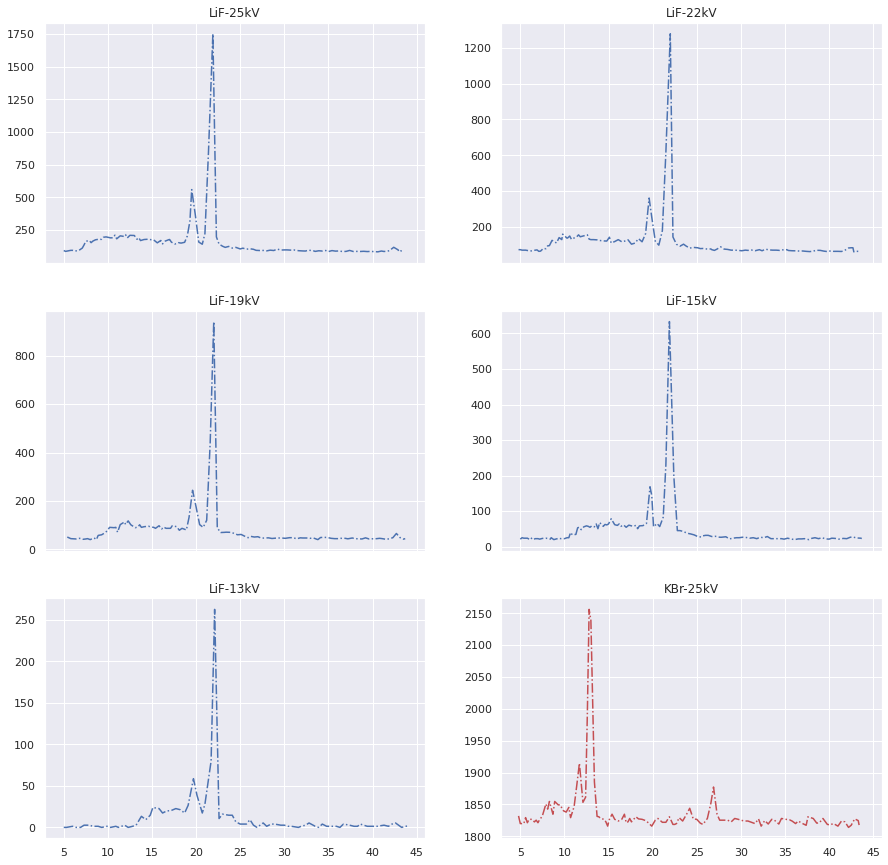

In [3]:
m = 2
n = int(len(csv_files) / m)

fig, axs = plt.subplots(n, m, figsize=(15, 15), sharex=True, sharey=False)

c = 0
for i in range(0, n):
    for j in range(0, m):
        if csv_files[c][0].lower() == "k":
            color = "r"
        else:
            color = "b"
        x = df[csv_files[c]]["theta"].dropna().to_numpy()
        y = df[csv_files[c]]["intensidad"].dropna().to_numpy()
        # Peaks
        peaks, _ = find_peaks(y, threshold=1)
        # for local maxima
        mx = argrelextrema(y, np.greater)
        # for local minima
        mn = argrelextrema(y, np.less)
        # Plot
        #axs[i, j].plot(x[peaks], y[peaks], "k*")
        #axs[i, j].plot(x[mx], y[mx], "go")
        axs[i, j].plot(x, y, f"{color}-.")
        axs[i, j].set_title(csv_files[c])
        print("-----")
        print("Datos: ", csv_files[c])
        print("Puntos máximos: (Ángulo, Intensidad): ", list(zip(x[peaks], y[peaks])))
        print(" ")
        # Count for csv name
        c += 1

#for ax in axs.flat:
#    ax.set(xlabel="Ángulo (º)")

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

plt.savefig(FIGURES_PATH + "difractogramas.png")

In [4]:
from scipy.constants import Avogadro, c, e, Planck

errorAngulos = 0.1

# LiF picos resumen anterior
angulos_kb = np.array([19.5, 19.6, 19.6, 19.7, 19.7])
intensidad_kb = ([560.0, 361.33, 244.0, 168.67, 58.67])
angulos_ka = np.array([21.9, 22.0, 22.0, 21.9, 22.1])
intensidad_ka = ([1750.0, 1277.33, 941.33, 633.33, 262.67])
# KBr picos resumen anterior
# picos primer orden
KBr_angulos_kb = np.array([11.7])
KBr_angulos_ka = np.array([12.8])
# picos segundo orden
KBr_angulos_kb_orden2 = np.array([24.2])
KBr_angulos_ka_orden2 = np.array([26.9])

# Transiciones teóricas
energia_ka = np.array([8978-950, 8978-931])
energia_kb = np.array([8978-76])

print(f"Transiciones energéticas Ka_1,2 = {energia_ka.mean()} ; Kb = {energia_kb.mean()} ")
print(f"Media ángulos Ka = {angulos_ka.mean()} ; Kb = {angulos_kb.mean()} ")
print(f"Error ángulos E_Ka = {np.std(angulos_ka)} ; E_Kb = {np.std(angulos_kb)}")
print(" ")

# Distancias Bragg
n = 1
h = 4.135 * 10**(-15) # eV
# LiF
d_ka = (h * c * n) / (2 * energia_ka.mean() * math.sin(angulos_ka.mean() * np.pi / 180))
d_kb = (h * c * n) / (2 * energia_kb.mean() * math.sin(angulos_kb.mean() * np.pi / 180))
error_d_ka = (h * c * n * errorAngulos * math.cos(angulos_ka.mean() * np.pi / 180)) / (2 * energia_ka.mean() * math.sin(angulos_ka.mean() * np.pi / 180)**2)
error_d_kb = (h * c * n * errorAngulos * math.cos(angulos_kb.mean() * np.pi / 180)) / (2 * energia_kb.mean() * math.sin(angulos_kb.mean() * np.pi / 180)**2)
# KBr
# primer orden
KBr_d_ka = (h * c * n) / (2 * energia_ka.mean() * math.sin(KBr_angulos_ka.mean() * np.pi / 180))
KBr_d_kb = (h * c * n) / (2 * energia_kb.mean() * math.sin(KBr_angulos_kb.mean() * np.pi / 180))
error_KBr_d_ka = (h * c * n * errorAngulos * math.cos(KBr_angulos_ka.mean() * np.pi / 180)) / (2 * energia_ka.mean() * math.sin(KBr_angulos_ka.mean() * np.pi / 180)**2)
error_KBr_d_kb = (h * c * n * errorAngulos * math.cos(KBr_angulos_kb.mean() * np.pi / 180)) / (2 * energia_kb.mean() * math.sin(KBr_angulos_kb.mean() * np.pi / 180)**2)
# segundo orden
n = 2
KBr_d_ka_orden2 = (h * c * n) / (2 * energia_ka.mean() * math.sin(KBr_angulos_ka_orden2.mean() * np.pi / 180))
KBr_d_kb_orden2 = (h * c * n) / (2 * energia_kb.mean() * math.sin(KBr_angulos_kb_orden2.mean() * np.pi / 180))
error_KBr_d_ka_orden2 = (h * c * n * errorAngulos * math.cos(KBr_angulos_ka_orden2.mean() * np.pi / 180)) / (2 * energia_ka.mean() * math.sin(KBr_angulos_ka_orden2.mean() * np.pi / 180)**2)
error_KBr_d_kb_orden2 = (h * c * n * errorAngulos * math.cos(KBr_angulos_kb_orden2.mean() * np.pi / 180)) / (2 * energia_kb.mean() * math.sin(KBr_angulos_kb_orden2.mean() * np.pi / 180)**2)

print("LiF")
print("Distancia interplanar para Ka en LiF: ", d_ka)
print("Error distancia interplanar para Ka en LiF: ", error_d_ka)
print("Distancia interplanar para Kb en LiF: ", d_kb)
print("Error distancia interplanar para Kb en LiF: ", error_d_kb)
print("Distancia media: ", (d_ka+d_kb)/2)
print("Error distancia media: ", (error_d_ka+error_d_kb)/2)
print("Parámetro de red experimental: ", 2*(d_ka+d_kb)/2)
print("Error parámetro de red experimental: ", 2*(error_d_ka+error_d_kb)/2)
print(" ")
print("KBr PRIMER orden")
print("Distancia interplanar para Ka en KBr PRIMER orden: ", KBr_d_ka)
print("Error distancia interplanar para Ka en KBr PRIMER orden: ", error_KBr_d_ka)
print("Distancia interplanar para Kb en KBr PRIMER orden: ", KBr_d_kb)
print("Eror distancia interplanar para Kb en KBr PRIMER orden: ", error_KBr_d_kb)
print(" ")

print("KBr SEGUNDO orden")
print("Distancia interplanar para Ka en KBr SEGUNDO orden: ", KBr_d_ka_orden2)
print("Error distancia interplanar para Ka en KBr SEGUNDO orden: ", error_KBr_d_ka_orden2)
print("Distancia interplanar para Kb en KBr SEGUNDO orden: ", KBr_d_kb_orden2)
print("Error distancia interplanar para Kb en KBr SEGUNDO orden: ", error_KBr_d_kb_orden2)

print("Distancia media: ", (KBr_d_ka+KBr_d_kb+KBr_d_ka_orden2+KBr_d_kb_orden2)/4)
print("Error distancia media: ", (error_KBr_d_ka+error_KBr_d_kb+error_KBr_d_ka_orden2+error_KBr_d_kb_orden2)/4) # cero por hacer una medición, cogemos incertidumbre 0.1
print("Parámetro de red experimental: ", 2*(KBr_d_ka+KBr_d_kb+KBr_d_ka_orden2+KBr_d_kb_orden2)/2)
print("Error parámetro de red experimental: ", 2*(error_KBr_d_ka+error_KBr_d_kb+error_KBr_d_ka_orden2+error_KBr_d_kb_orden2)/2)
print(" ")

# Parámetros de red
M_lif = 25.939 # g/mol
densidad_lif = 2.64 # g/cm3
a_lif = ((4 * M_lif) / (densidad_lif * Avogadro)) ** (1/3) # parámetro de red
a_lif = a_lif / 10**(-8) # pasar a Amstroms
print("Parámetro de red teórico LiF (A): ", a_lif)

M_kbr = 119.002 # g/mol
densidad_kbr = 2.74 # g/cm3
a_kbr = ((4 * M_kbr) / (densidad_kbr * Avogadro)) ** (1/3) # parámetro de red
a_kbr = a_kbr / 10**(-8) # pasar a Amstroms
print("Parámetro de red teórico KBr (A): ", a_kbr)

Transiciones energéticas Ka_1,2 = 8037.5 ; Kb = 8902.0 
Media ángulos Ka = 21.98 ; Kb = 19.62 
Error ángulos E_Ka = 0.07483314773547989 ; E_Kb = 0.07483314773547838
 
LiF
Distancia interplanar para Ka en LiF:  2.0603700272435142e-10
Error distancia interplanar para Ka en LiF:  5.104724292582674e-11
Distancia interplanar para Kb en LiF:  2.073591971964855e-10
Error distancia interplanar para Kb en LiF:  5.8168967197673615e-11
Distancia media:  2.0669809996041846e-10
Error distancia media:  5.4608105061750174e-11
Parámetro de red experimental:  4.133961999208369e-10
Error parámetro de red experimental:  1.0921621012350035e-10
 
KBr PRIMER orden
Distancia interplanar para Ka en KBr PRIMER orden:  3.4807788058411144e-10
Error distancia interplanar para Ka en KBr PRIMER orden:  1.5320705134396718e-10
Distancia interplanar para Kb en KBr PRIMER orden:  3.433506613733372e-10
Eror distancia interplanar para Kb en KBr PRIMER orden:  1.657977631526431e-10
 
KBr SEGUNDO orden
Distancia interplana

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     35.44
Date:                Sat, 21 Aug 2021   Prob (F-statistic):            0.00948
Time:                        20:21:22   Log-Likelihood:                 16.022
No. Observations:                   5   AIC:                            -28.04
Df Residuals:                       3   BIC:                            -28.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0382      0.024      1.585      0.2

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


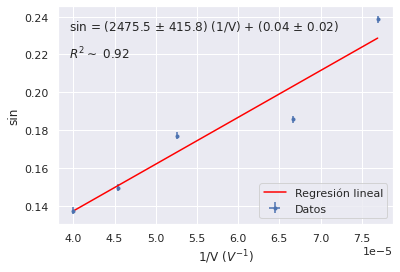

In [5]:
angulos_min = np.array(
    [
        7.9, 8.6, 10.2, 10.7, 13.8
    ]
)
voltaje = np.array(
    [
        25, 22, 19, 15, 13
    ]
)

y = np.sin(angulos_min * np.pi / 180)
x = 1 / (voltaje*1000)
X = sm.add_constant(x, prepend=True) # Our model needs an intercept so we add a column of 1s

ols1 = sm.OLS(y, X)
ols_result1 = ols1.fit()
print(ols_result1.summary())
print(" ")

y_pred = ols_result1.predict(X)
print("Coeficiente: %.3f" % ols_result1.params[1])
print("Término independiente: %.3f" % ols_result1.params[0])
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("R2: %.2f" % ols_result1.rsquared)
print(" ")

errorAngulo = 0.1 # grados
errorAngulo = np.cos(angulos_min * np.pi / 180) * errorAngulo * np.pi / 180

cte_planck = 2 * ((d_ka+d_kb)/2) * e * ols_result1.params[1] / c
#errorPlanck = (2 * e / c) * (ols_result1.params[1] * ((error_d_ka+error_d_kb)/2) + ((d_ka+d_kb)/2) * ols_result1.bse[1])
errorPlanck = (2 * e / c) * (((d_ka+d_kb)/2) * ols_result1.bse[1])
print("Cte Planck (Js): ", cte_planck)
print("Error cte Planck (Js): ", errorPlanck)

plt.errorbar(x, y, xerr=0, yerr=errorAngulo, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.xlabel("1/V ($V^{-1}$)")
plt.ylabel("sin")
plt.figtext(.15, .8, f"sin = (%.1f $\pm$ %.1f) (1/V) + (%.2f $\pm$ %.2f)" % (ols_result1.params[1], ols_result1.bse[1], ols_result1.params[0], ols_result1.bse[0]))
plt.figtext(.15, .7, f"$R^2 \sim$ %.2f" % ols_result1.rsquared)
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig(FIGURES_PATH + "planck.png")
plt.show()

In [6]:
100 * (cte_planck - Planck) / Planck

-17.46164081166086